# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Делаем итерацию градиентного спуска:
$$w_{new} = w_{old} - \frac{\alpha}{c} gradR - grad\left(\frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right]\right) $$

$$w_{new,j} = w_{old,j} - 2\frac{\alpha}{c}w_j -(\frac{1}{n}\sum_{i=1}^n 2(y_i-<x_i,w>)x_i^j) $$


$$w_{new} = w_{old} - 2\frac{\alpha}{c}w +\frac{2}{n}\alpha X^T(y-X\cdot w)$$

Ответ: $w_{new} = w_{old} - 2\frac{\alpha}{c}w_{old} +\frac{2}{n}\alpha X^T(y-X\cdot w_{old})$

$ grad(L(w)) =  \frac{2}{c}w - \frac{2}{n} X^T(y-X\cdot w)$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
Для логистической: 
$$L(w) = - \frac{1}{n}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

 $$grad\left(\frac{1}{C}R(w)\right) = 2\frac{\alpha}{c}w \text{-из прошлой задачи}$$
 
 Делаем итерацию градиентного спуска:

$$w_{new} = w_{old} -  2\frac{\alpha}{c}w  -grad\left(- \frac{1}{n}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i)\right) \right]$$

Обозначим величину под суммой за А:

Тогда 
$$grad(A) =  grad\left(y_i log(a_i) + (1 - y_i)log(1 - a_i)\right)$$

Рассмотрим j-ю компоненту вектора градиента:

$$(...)'_j = \left(y_i log\left(\frac{1}{1 + e^{-<w,x_i>}}\right) + (1 - y_i)log\left(\frac{1}{1 + e^{<w,x_i}}\right)\right)'_j$$

По свойствам логарифма:


$$(...)'_j = \left(-y_i log\left(1 + e^{-<w,x_i>}\right) - (1 - y_i)log\left(1 + e^{<w,x_i}\right)\right)'_j$$

Берем производную:

$$(...)'_j = \left(-y_i log\left(1 + e^{-<w,x_i>}\right) - (1 - y_i)log\left(1 + e^{<w,x_i}\right)\right)'_j$$

$$(...)'_j = -y_i \frac{1}{1 + e^{-<w,x_i>}}(-e^{-<w,x_i>}) x_i^j - (1 - y_i)\frac{e^{<w,x_i}}{1 + e^{<w,x_i>}}x_i^j$$

Пользуемся свойством сигмоиды: $\sigma(x) + \sigma(-x) = 1$

$$(...)'_j = \frac{y_ix_i^je^{-<w,x_i>}}{1 + e^{-<w,x_i>} } - (1 - y_i)x_i^j \left(1 - \frac{1}{1 +  e^{-<w,x_i>}}\right)$$

Пользуемся $\left(1 - \frac{1}{1 +  e^{-<w,x_i>}}\right) = \frac{e^{-<w,x_i>}}{1 + e^{-<w,x_i>}}$ и приводим дроби к одному
знаменателю:

$$(...)'_j = \frac{y_ix_i^je^{-<w,x_i>} - (1-y_i)x_i^j}{1 + e^{-<w,x_i>} }$$

Вспоминаем что  в исходном выражении перед этим еще стоит $\frac{1}{n}$ и $\sum$:

$$\frac{1}{n} \sum_i A = \frac{1}{n} \sum_i^n \frac{y_ix_i^je^{-<w,x_i>} - (1-y_i)x_i^j}{1 + e^{-<w,x_i>} } = \frac{1}{n} \sum_i^n
\frac{y_ix_i^j(1+e^{-<w,x_i>}) - x_i^j}{1 + e^{-<w,x_i>}} = \frac{1}{n} \sum_i^n y_ix_i^j -x_i^j \sigma(-<w,x_i>)= \frac{1}{n} X^T(y - \sigma(X \cdot w))$$

$$w_{new} = w_{old} - grad\left(\frac{1}{C}R(w)\right) + \frac{1}{n} \sum_i A = \frac{1}{n}$$





Ответ:

$w_{new} = w_{old} - 2\frac{\alpha}{c}w_{old} + \frac{1}{n} X^T(y - \sigma(X \cdot w_{old}))$

Разница с ответом в предыдущей задаче только в коэффициенте перед вторым слагаемым(исчезла двойка) и теперь вместо выражения $X \cdot w$
берется его сигмоида.

$ grad(L(w)) =  \frac{2}{c}w - \frac{1}{n} X^T(y-\sigma(X\cdot w))$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

1)
$$L(w) = \frac{1}{N} \sum_i (y_i - a_i)^2$$

Вычисляем Гессиан:

$$\frac{\partial L}{\partial w_k} = -\frac{1}{N}\sum_i 2(y_i - <w,x_i>)x_i^k$$

$$\frac{\partial^2 L}{\partial w_k \partial w_l} = -\frac{2}{N}\sum_i(-x_i^k x_i^l) = \frac{2}{N}\sum_i x_i^k x_i^l = \frac{2}{N}X^TX$$

$\frac{2}{N}$ - можно отбросить, тк не влияет на положительную определенность матрицы.

Рассмотрим соответсвующую квадратичную форму для всех не нулевых z:

В силу того что по условию X невырожденная получаем:

$$z^TX^TXz = (Xz)^T(Xz) = ||Xz||^2 > 0 $$

Следовательно Гессиан положительно определен и $w = (X^TX)^{-1}X^TY $ действительно является точкой минимума ч.т.д.

2)Делаем выкладки по анологии с лекцией и учитываем регулязацию:
$$\nabla_w Q(w) = \frac{1}{N}\left((X^TX + X^TX)w - 2X^Ty \right) - 2\frac{w}{C} = 0$$

$$(\frac{2X^TX}{N} - \frac{2}{C})w = \frac{2X^Ty}{N}$$

$$w = (\frac{X^TX}{N} - \frac{1}{C})^{-1}\frac{X^Ty}{N} = \frac{1}{N^2}(X^TX - \frac{N}{C})^{-1}X^Ty $$

Ответ: $w =\frac{1}{N^2}\left(X^TX - \frac{N}{C}\right)^{-1}X^Ty$

***Ваше решение здесь***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***


Введем обозначения:
$a(x_i) = a$, $A = p(y_i = 1 |x_i )$ , $f = E(L | x_i)$

Тогда в новых терминаз задача сводиться к поиску минимума $f(a) = -Aloga - (1-A)log(1 - a)$:

Вычисляем производную и приравниваем к $0$:

$$f' = -\frac{A}{a} - \frac{1 - A}{1 - a}(-1) = \frac{1 - A}{1 - a} -\frac{A}{a} = 0 $$

$$(1 - A)a = A(1 - a) $$

$$a -Aa = a - Aa$$

Нашли точку где производная $0$:

$a = A = p(y_i = 1 |x_i )$

Проверим что это точка минимума:

$$f'' = \left((1 -A)\frac{1}{(1 - a)^2} + \frac{A}{a^2}\right)\big|_{a = A} = \frac{1-A}{(1-A)^2} + \frac{A}{A^2} = \frac{1}{1 -A} + \frac{1}{A} = \frac{A+1-A}{(1-A)A} = \frac{1}{(1-A)A} > 0 $$

Таким образом доказано:
что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Так как $w_0$ можно считать весом при фиктивном признаке, значение которого всегда тождественно = 1. То нет смысла в том чтоб вводить его как дополнительный параметр в регуляризации, который ни на что не влияет. 

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    if shuffle:
        idx = np.arange(X.shape[0])
        np.random.shuffle(idx)

    for start in range(0, X.shape[0], batch_size):
        end = min(start + batch_size, X.shape[0])

        if shuffle:
            batch = idx[start:end]
        else:
            batch = slice(start, end)

        X_batch = X[batch, :]
        y_batch = y[batch]
        yield (X_batch, y_batch)

In [17]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    ## Your code Here
    return 1/(1 + np.exp(-x))

from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss = 1/X_batch.shape[0] * np.sum((y_batch - np.dot(X_batch, self.weights))**2) \
            + 1/self.C * np.sum(self.weights[1:]**2)
        if self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, self.weights))
            loss = -1/X_batch.shape[0] * (np.sum(y_batch * np.log(a) + (1 - y)*(np.log(1-a)) ))\
            + 1/self.C * np.sum(self.weights[1:]**2)
        
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        tmp = 2/self.C * np.insert(self.weights[1:], 0, 0) ##
        if self.model_type == 'lin_reg':
            loss_grad = tmp - 2/X_batch.shape[0]*np.dot\
            (X_batch.T,(y_batch - np.dot(X_batch, self.weights)))
        if self.model_type == 'log_reg':
            loss_grad = tmp - 1/X_batch.shape[0]*np.dot\
            (X_batch.T,(y_batch - sigmoid(np.dot(X_batch, self.weights))))
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
        
  
    def fit(self,X, y,batch_size = 1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        E = np.ones((X.shape[0], 1))
        X = np.column_stack((E,X))
        # Нужно инициализровать случайно веса
        self.weights = np.array([random.random() for i in range(X.shape[1])])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X,y,batch_size = batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_hat = (np.dot(X, self.weights)) > 0
        if self.model_type == 'log_reg':
            y_hat = (sigmoid(np.dot(X, self.weights))) > 0
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [7]:
def plot_decision_boundary(w, X):
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    y = np.array([y_min, y_max])
    x = -(w[2]*y + w[0])/w[1]

    plt.plot(x, y)    

self.weights= [0.62670648 0.72754361 0.0242727 ]


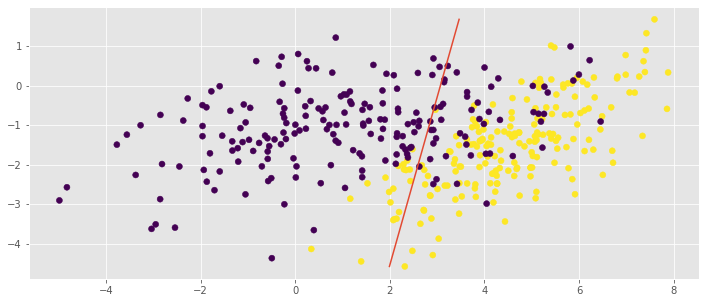

In [8]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])

gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
my_batch_gen = batch_generator(X,y)


clf = MySGDClassifier(batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='log_reg')
clf.fit(X, y)
plot_decision_boundary(clf.weights, X)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [9]:
from sklearn.datasets import make_classification

In [10]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

self.weights= [0.84823399 0.57085925 0.88524425 0.24733364 0.31345921 0.9257132
 0.95381116 0.24605141 0.30604517 0.49782256 0.59985829]
self.weights= [0.44607519 0.39416527 0.79321541 0.32323842 0.46782689 0.77470152
 0.44946257 0.63173621 0.53500519 0.58388169 0.6426336 ]
self.weights= [0.316709   0.3977376  0.70106414 0.87139163 0.54934533 0.78475072
 0.38071363 0.08130516 0.37300211 0.51703626 0.76382289]
self.weights= [0.41917994 0.76481223 0.15798639 0.17602591 0.15808377 0.82117802
 0.21254678 0.69695252 0.2671929  0.07694926 0.01217893]
self.weights= [0.67953699 0.50238002 0.8075442  0.12037752 0.09168459 0.0572141
 0.14007662 0.4882672  0.6747585  0.73996751 0.20478944]
self.weights= [0.14283737 0.56312393 0.2858745  0.54360192 0.00148035 0.80166931
 0.51982455 0.44498604 0.07485379 0.66348701 0.90664515]
self.weights= [0.21591565 0.07816198 0.43820256 0.14967447 0.09088342 0.26843726
 0.62270281 0.88001502 0.27939085 0.69021335 0.70273285]
self.weights= [0.66716456 0.38997888

C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:41: RuntimeWarning: overflow encountered in double_scalars
  + 1/self.C * np.sum(self.weights[1:]**2)
C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:40: RuntimeWarning: overflow encountered in square
  loss = 1/X_batch.shape[0] * np.sum((y_batch - np.dot(X_batch, self.weights))**2) \
C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:41: RuntimeWarning: overflow encountered in square
  + 1/self.C * np.sum(self.weights[1:]**2)
C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:56: RuntimeWarning: overflow encountered in multiply
  tmp = 2/self.C * np.insert(self.weights[1:], 0, 0) ##
C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:70: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.alpha * new_grad


self.weights= [0.31946143 0.42222534 0.0180744  0.43248078 0.7622588  0.90481392
 0.56011968 0.97489461 0.77262922 0.70212739 0.67662713]
self.weights= [0.90110252 0.55286487 0.52212343 0.20913667 0.78483044 0.15762535
 0.24500254 0.66833286 0.04108188 0.07586545 0.10086519]
self.weights= [0.86527055 0.03311224 0.63748301 0.4091017  0.97321461 0.02697824
 0.64585622 0.6672622  0.06510606 0.49405594 0.91364036]
self.weights= [0.28867526 0.32625125 0.30631512 0.11531976 0.09811225 0.33180037
 0.64062955 0.97300562 0.96949097 0.32368015 0.71667239]
self.weights= [0.62823812 0.36237247 0.85683744 0.85075884 0.27913196 0.61085457
 0.66953711 0.04971899 0.94267621 0.3150581  0.25228395]
self.weights= [1.51448274e-01 4.68414787e-01 2.39523588e-01 3.81235181e-01
 1.10441963e-01 6.70617075e-01 3.49233731e-04 7.74359901e-01
 7.28807378e-01 6.32427467e-01 9.63064913e-01]
self.weights= [0.57351907 0.34338151 0.7381367  0.57104119 0.97388246 0.63552788
 0.17571875 0.81018463 0.51838003 0.07226169 0

C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:10: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:44: RuntimeWarning: divide by zero encountered in log
  loss = -1/X_batch.shape[0] * (np.sum(y_batch * np.log(a) + (1 - y)*(np.log(1-a)) ))\
C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:44: RuntimeWarning: invalid value encountered in multiply
  loss = -1/X_batch.shape[0] * (np.sum(y_batch * np.log(a) + (1 - y)*(np.log(1-a)) ))\
C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:45: RuntimeWarning: overflow encountered in double_scalars
  + 1/self.C * np.sum(self.weights[1:]**2)
C:\CONDA\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\vda20\AppData\Local\Temp/ipykernel_12004/1374493858.py:45: RuntimeWarning: overflow encountered in square
  

self.weights= [0.21483702 0.97071244 0.64226032 0.78254444 0.68202969 0.23245922
 0.19786889 0.38921778 0.77299541 0.63184035 0.68226177]


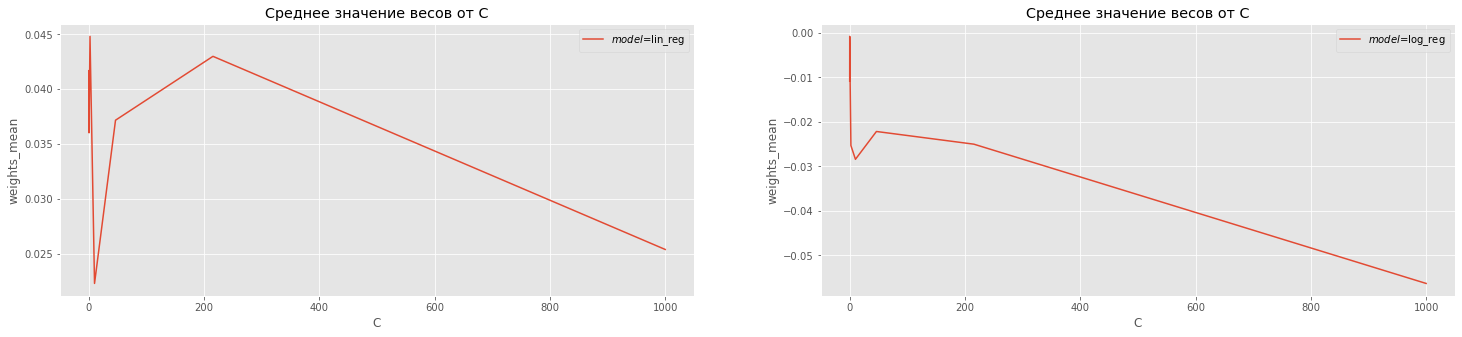

In [16]:
## Your Code Here
fig = plt.figure(figsize=(25, 5))
for i, model in enumerate(['lin_reg', 'log_reg']):
    mas = []
    ax = fig.add_subplot(1, 2, i + 1, ylabel='weights_mean', xlabel= 'C')
    ax.set_title('Среднее значение весов от С')
    for C in np.logspace(3, -3, 10):
        clf = MySGDClassifier(batch_generator, C=C, alpha=0.01, max_epoch=1, model_type=model)
        clf.fit(X,y)
        mas.append(np.mean(clf.weights))
    plt.plot(np.logspace(3, -3, 10),mas, label=f'$model$={model}')
    ax.legend()
#Прокрутите ниже до графика

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [4]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [5]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [10]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***